In [0]:
import pandas as pd

In [2]:
!pip install seaborn==0.9.0

Com o pandas importado, vamos buscar os dados dos filmes pela URI e renomear as colunas do Dataframe:

In [3]:
uri_filmes = 'https://raw.githubusercontent.com/oyurimatheus/clusterirng/master/movies/movies.csv'
filmes = pd.read_csv(uri_filmes)

filmes.columns = ['filme_id', 'titulo', 'generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Com isso, podemos extrair os dummies da coluna de gêneros. Logo, vamos falar para o nosso Dataframe de filmes pegar a coluna gêneros como string (str) e pegar os dummies (get_dummies):

In [0]:
generos = filmes.generos.str.get_dummies()

Isso retorna para gente um Dataframe com os dummies dos gêneros.

Podemos pegar este Dataframe e pedir para o pandas concatená-lo (concat) com o de filmes com as colunas (axis=1).

In [5]:
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()    

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Por fim, temos que reescalar os dummies para saber quais dos gêneros mais influenciam os filmes. Portanto vamos importar o escalador da biblioteca sklearn e criar um objeto a partir da classe StandardScaler:

Vamos falar para o scaler aprender com os dummies e transformá-los (fit_transform) para que, dessa forma, tenhamos mais informações sobre como os gêneros influenciam o filme:

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

Em primeiro lugar, temos que importar do módulo de cluster da sklearn o algoritmo do K-Means.

Após isso, podemos criar nosso objeto que representará o modelo KMeans. Para criar um objeto do K-Means, precisamos falar o número de clusters (n_clusters), isto é, quantos grupos diferentes serão agrupados. No caso, apenas para testar o algoritmo, vamos passar três como valor:



In [0]:
from sklearn.cluster import KMeans
modelo = KMeans(n_clusters=3)


Em seguida, podemos falar para o K-Means agrupar os dados (generos_escalados) para a gente através do método fit:

Podemos ver os resultados do agrupamento imprimindo os rótulos (labels_) do modelo:


In [8]:
modelo.fit(generos_escalados)
print(f'Grupos {modelo.labels_}')


Grupos [1 1 2 ... 2 1 2]


Vamos começar visualizando os centróides de cada grupo. Para isso, podemos falar para o Python imprimir os centróides e os nomes dos gêneros - que são as colunas do data frame generos:

In [9]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.39172296 -0.19306738 -0.23582403 -0.26199433 -0.56530245
   0.88393749 -0.21338423  0.08299205 -0.16594382  0.28566986  0.41911655
  -0.06765486 -0.17670595  0.64679591 -0.31479708  0.08361451  1.45611365
  -0.11417604 -0.07295479]
 [-0.05917995  0.6192717   1.57363058  1.49406819  1.29492401 -0.03655211
  -0.3113108  -0.21033429 -0.62682714  1.08843483 -0.09492563 -0.23269527
   0.61269414  0.23621481 -0.14894139 -0.28405598  0.62637632 -0.3504615
  -0.15991545 -0.05765748]
 [ 0.03611444 -0.28967302 -0.27523482 -0.24095415 -0.18650066  0.22733863
  -0.27350298  0.12953874  0.10727437 -0.17780646 -0.08965481 -0.11075035
  -0.11007736  0.0159681  -0.21767076  0.18526501 -0.17177887 -0.4866647
   

Para facilitar o trabalho e a manipulação desses dados, vamos criar um data frame chamado grupos a partir dos centróides.

Portanto, falamos para o pandas (pd) criar um DataFrame a partir dos centróides e nomear as colunas (columns) com o nome dos gêneros:

In [0]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)

Podemos ver o data frame colocando a variável grupos como a última instrução da célula.

Vamos visualizar os centróides transpondo (transpose) o data frame de grupos e pedindo para o pandas plotar (plot) um gráfico de barras (bar). Como queremos que cada cluster tenha seu próprio gráfico, vamos falar que teremos subplots e para facilitar a visualização, vamos definir um tamanho para a figura (figsize) e dizer que não queremos compartilhar os labels do eixo x:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb19a952a20>,
      dtype=object)

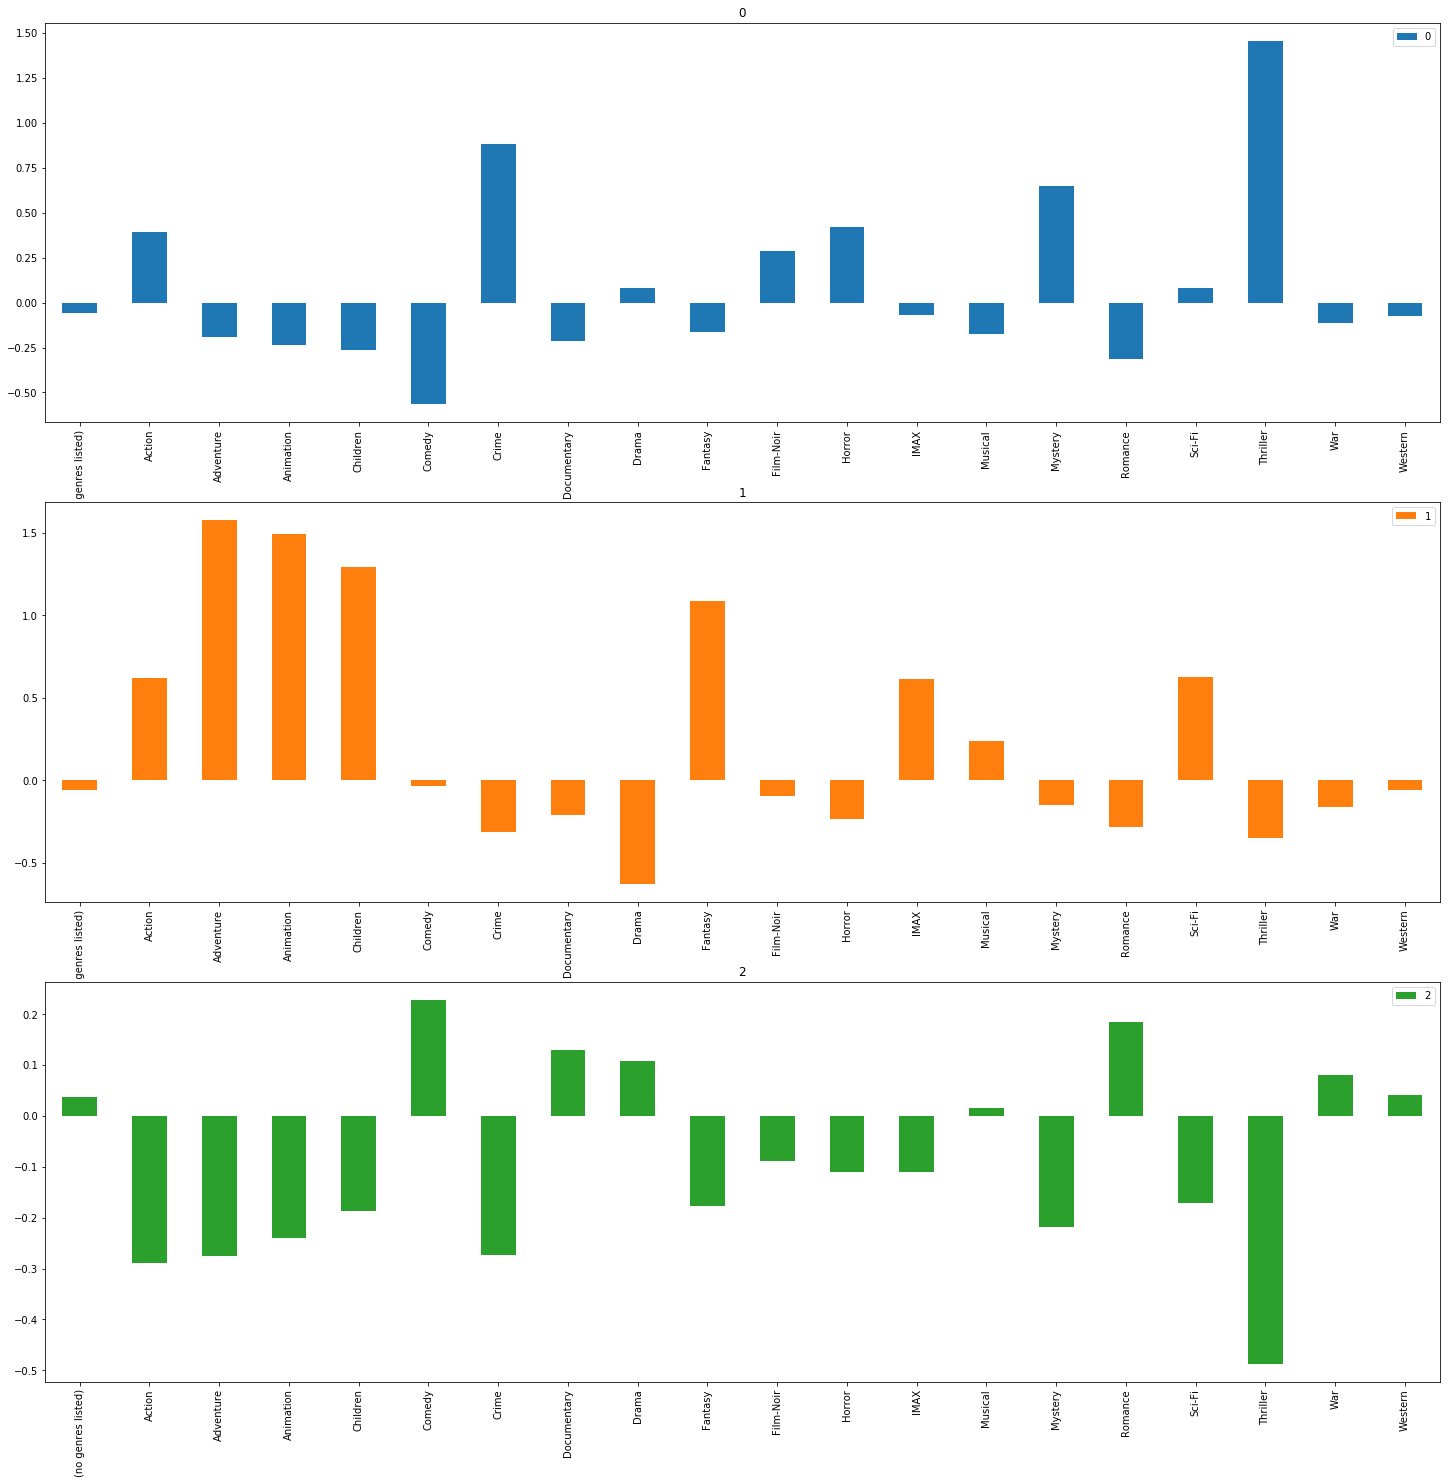

In [11]:
grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 25),
               sharex=False)

Podemos visualizar os filmes pertencentes a algum grupo, por exemplo o grupo 0. Basta realizar um filtro pelos labels_ do modelo e pedir alguns dados da amostra:

In [12]:
grupo = 0

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2713,3639,"Man with the Golden Gun, The (1974)",Action|Adventure|Thriller,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7026,68597,Scorpio (1973),Action|Drama|Thriller,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
7214,73017,Sherlock Holmes (2009),Action|Crime|Mystery|Thriller,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
4389,6440,Barton Fink (1991),Drama|Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5088,8016,"Getaway, The (1972)",Action|Crime|Drama|Thriller,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
3262,4409,Shadows and Fog (1991),Comedy|Drama|Mystery|Thriller,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0
7535,84844,Brother 2 (Brat 2) (2000),Crime|Drama,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
952,1253,"Day the Earth Stood Still, The (1951)",Drama|Sci-Fi|Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
1067,1387,Jaws (1975),Action|Horror,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8284,105835,"Double, The (2013)",Comedy|Drama|Thriller,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


Vamos plotar um gráfico de pontos. Porém, temos 20 gêneros, ou seja, 20 dimensões. Logo, antes de plotar o gráfico, temos que reduzir as dimensões. Para isso, vamos utilizar o algoritmo TNSE do módulo manifold da sklearn.

In [0]:
from sklearn.manifold import TSNE


A partir desse algoritmo podemos criar um objeto TSNE e utilizar o método fit_transform. Este método nos retorna um array do numpy com as features reduzidas.

In [0]:
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)

Agora basta importamos o seaborn e plotar um gráfico de dispersão (scatterplot).

Mas antes, vamos atribuir um valor para o tamanho da figura (figure.figsize), apenas para facilitar a visualização:

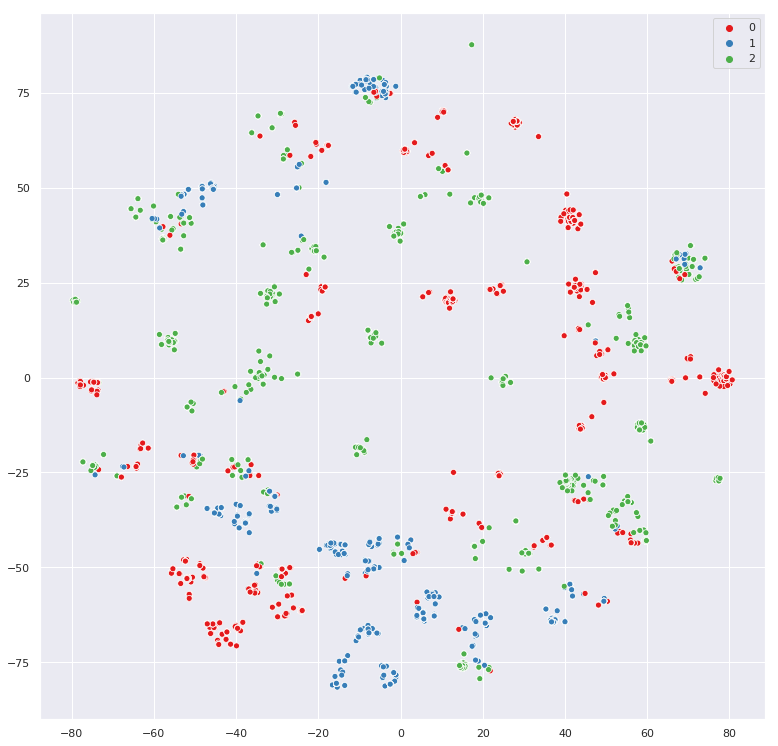

In [15]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})



sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=modelo.labels_,
               palette=sns.color_palette('Set1', 3))

Vamos tentar fazer um agrupamento um pouquinho diferente do primeiro. Neste caso, vamos criar um modelo K-Means e falar para ele agrupar os dados em 20 grupos (um para cada gênero). Com o modelo criado, vamos treiná-lo passando os generos_escalados:

Como antes, vamos criar um data frame a partir do centróides do grupo:

E plotar um gráfico para cada centróide. Dessa vez, vamos rotacionar (rot) os rótulos do eixo x para ficar mas legível:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb197974908>,
      dtype=object)

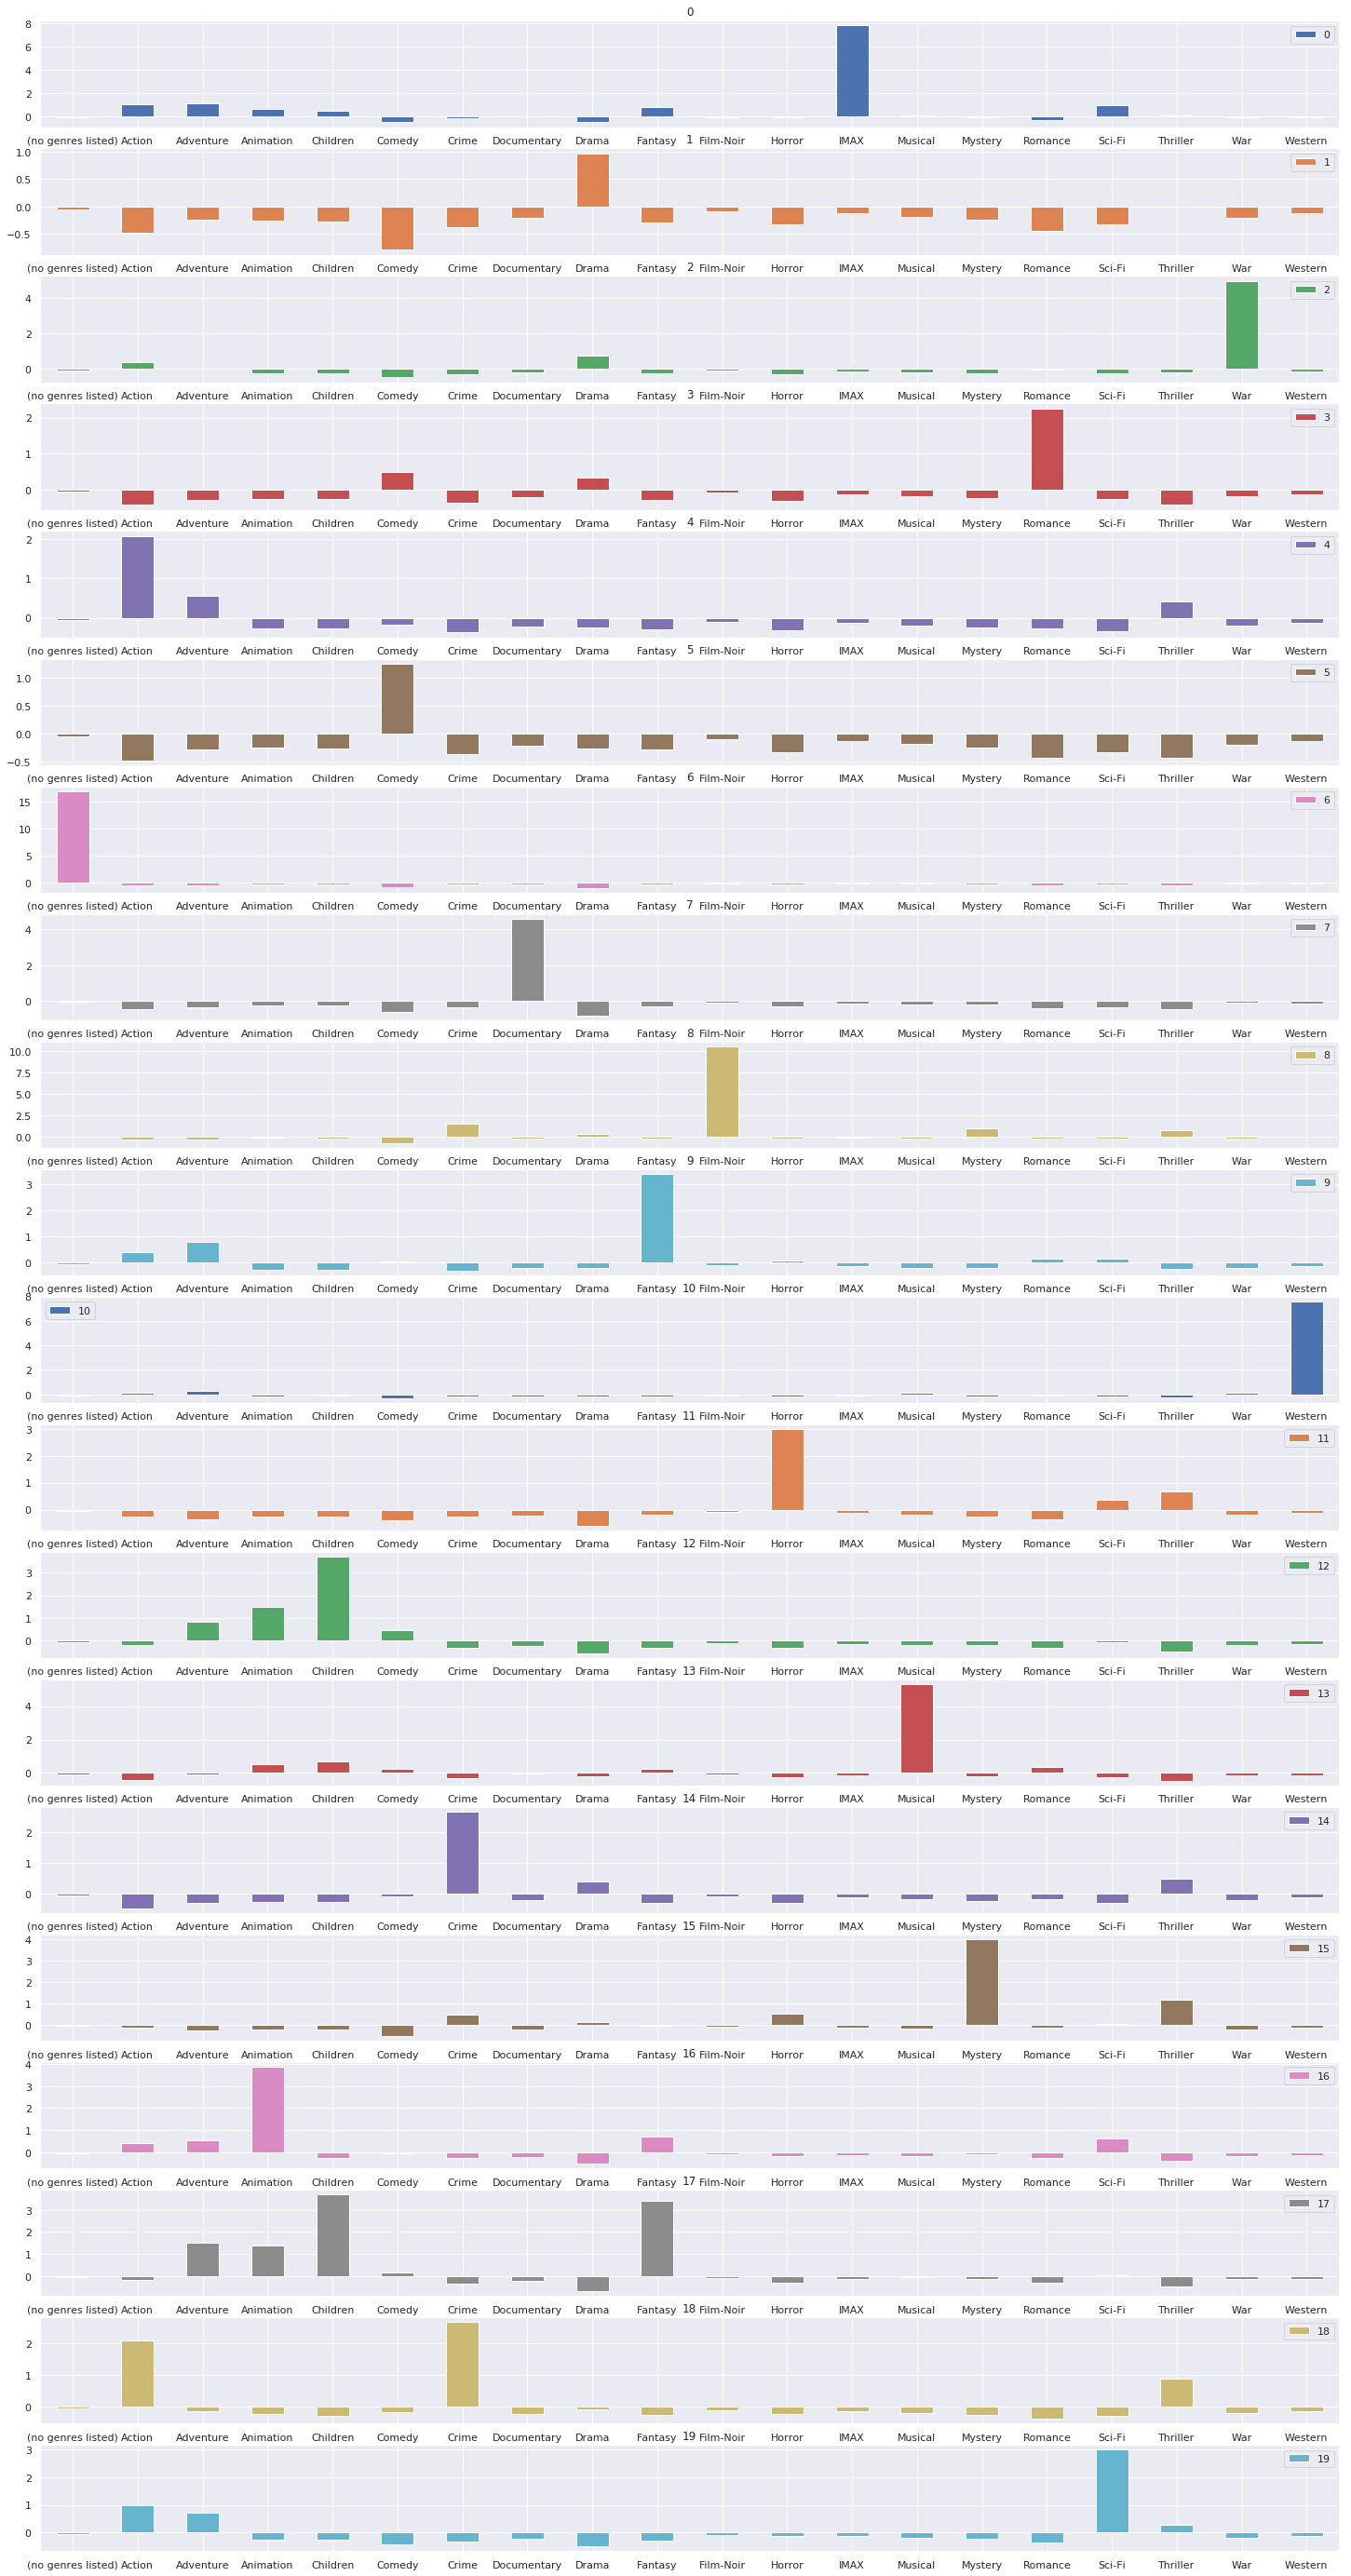

In [16]:
modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

Como antes, vamos pegar algum grupo e fazer uma filtragem no data frame de filmes para ver como foram agrupados:

In [17]:

grupo = 2

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
5549,26681,Bullet in the Head (1990),Action|Drama|War,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1421,1944,From Here to Eternity (1953),Drama|Romance|War,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
906,1204,Lawrence of Arabia (1962),Adventure|Drama|War,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
886,1183,"English Patient, The (1996)",Drama|Romance|War,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4153,5975,War and Peace (1956),Drama|Romance|War,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
7315,77201,Valhalla Rising (2009),Action|Drama|War,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
97,110,Braveheart (1995),Action|Drama|War,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4025,5690,Grave of the Fireflies (Hotaru no haka) (1988),Animation|Drama|War,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
404,466,Hot Shots! Part Deux (1993),Action|Comedy|War,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8217,103685,"Field in England, A (2013)",Drama|Fantasy|Thriller|War,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0


Aparentemente, os dados foram agrupados de uma maneira que faz sentido. Mas então, quantos grupos devemos usar?

Vamos criar a função que recebe o número de clusters e os dados e retorna o número de clusters e o erro (inertia_) daquele modelo:

In [0]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [19]:
kmeans(20, generos_escalados)

[20, 56794.26932185147]

In [20]:
kmeans(3, generos_escalados)


[3, 166144.03742533986]

Vamos rodar essa função começando a agrupar em um único grupo e ir agrupando até 40 grupos. Para isso, vamos usar uma compressão de lista do Python:

In [21]:

resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 181249.42623908265],
 [3, 168571.90048287867],
 [4, 157188.05302432788],
 [5, 147157.0075440091],
 [6, 138506.7999797061],
 [7, 129643.39117797997],
 [8, 119054.69174647985],
 [9, 110718.1287326707],
 [10, 102853.3737406556],
 [11, 95210.84766362017],
 [12, 86292.75214366462],
 [13, 80511.1001740294],
 [14, 73363.29902617805],
 [15, 66811.19149309325],
 [16, 63908.83651883314],
 [17, 62158.12296130547],
 [18, 59464.71933317058],
 [19, 56713.48031612347],
 [20, 55698.40575857363],
 [21, 53023.539090425526],
 [22, 51745.742845156485],
 [23, 50206.89952095113],
 [24, 48916.31386267337],
 [25, 47744.94750644509],
 [26, 46987.35637698647],
 [27, 45340.93283748377],
 [28, 44083.02901456644],
 [29, 43733.75679310645],
 [30, 42574.493576674715],
 [31, 41919.825707779484],
 [32, 41122.221493363606],
 [33, 39783.35304132067],
 [34, 39711.317771398695],
 [35, 38387.11812751293],
 [36, 37750.54347910285],
 [37, 36777.82519972852],
 [38, 37079.94222024887],
 [39, 36424.90012610

Para facilitar o trabalho, vamos transformar essa variável em um data frame para facilitar sua manipulação:

In [22]:

resultado = pd.DataFrame(resultado, 
            columns=['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,181249.426239
2,3,168571.900483
3,4,157188.053024
4,5,147157.007544
5,6,138506.799980
6,7,129643.391178
7,8,119054.691746
8,9,110718.128733
9,10,102853.373741


Agora, basta plotarmos um gráfico da coluna inertia do data frame. Lembrando que devemos passar a coluna grupos como parâmetro dos rótulos do eixo x:

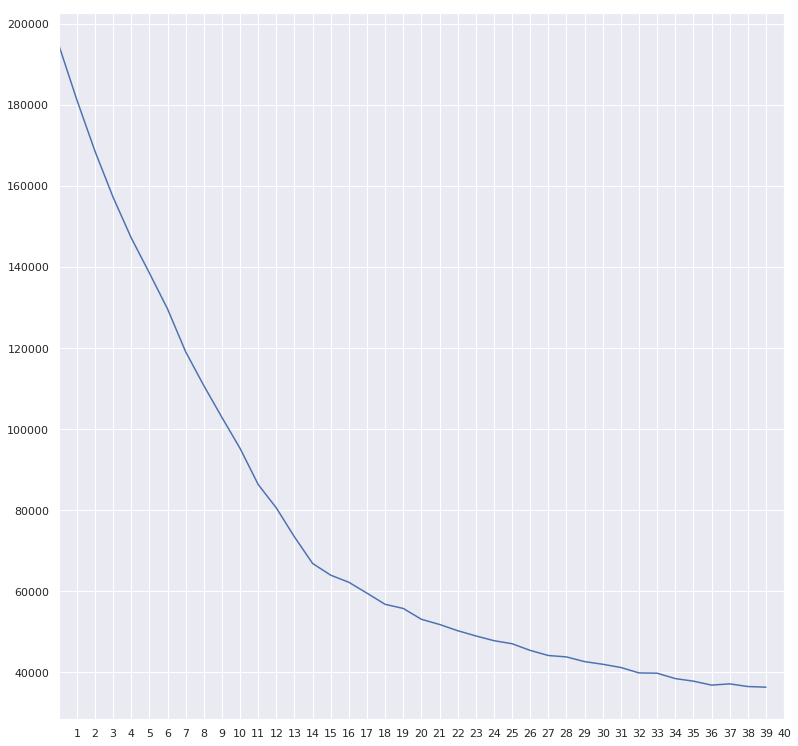

In [23]:

resultado.inertia.plot(xticks=resultado.grupos)

Podemos ver que o ponto de quebra no gráfico foi próximo ao número 17, logo, esse é o número de clusters que otimiza nosso modelo. Podemos rodar um novo modelo com 17 grupos e mostrar seus centróides:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb194a80e10>,
      dtype=object)

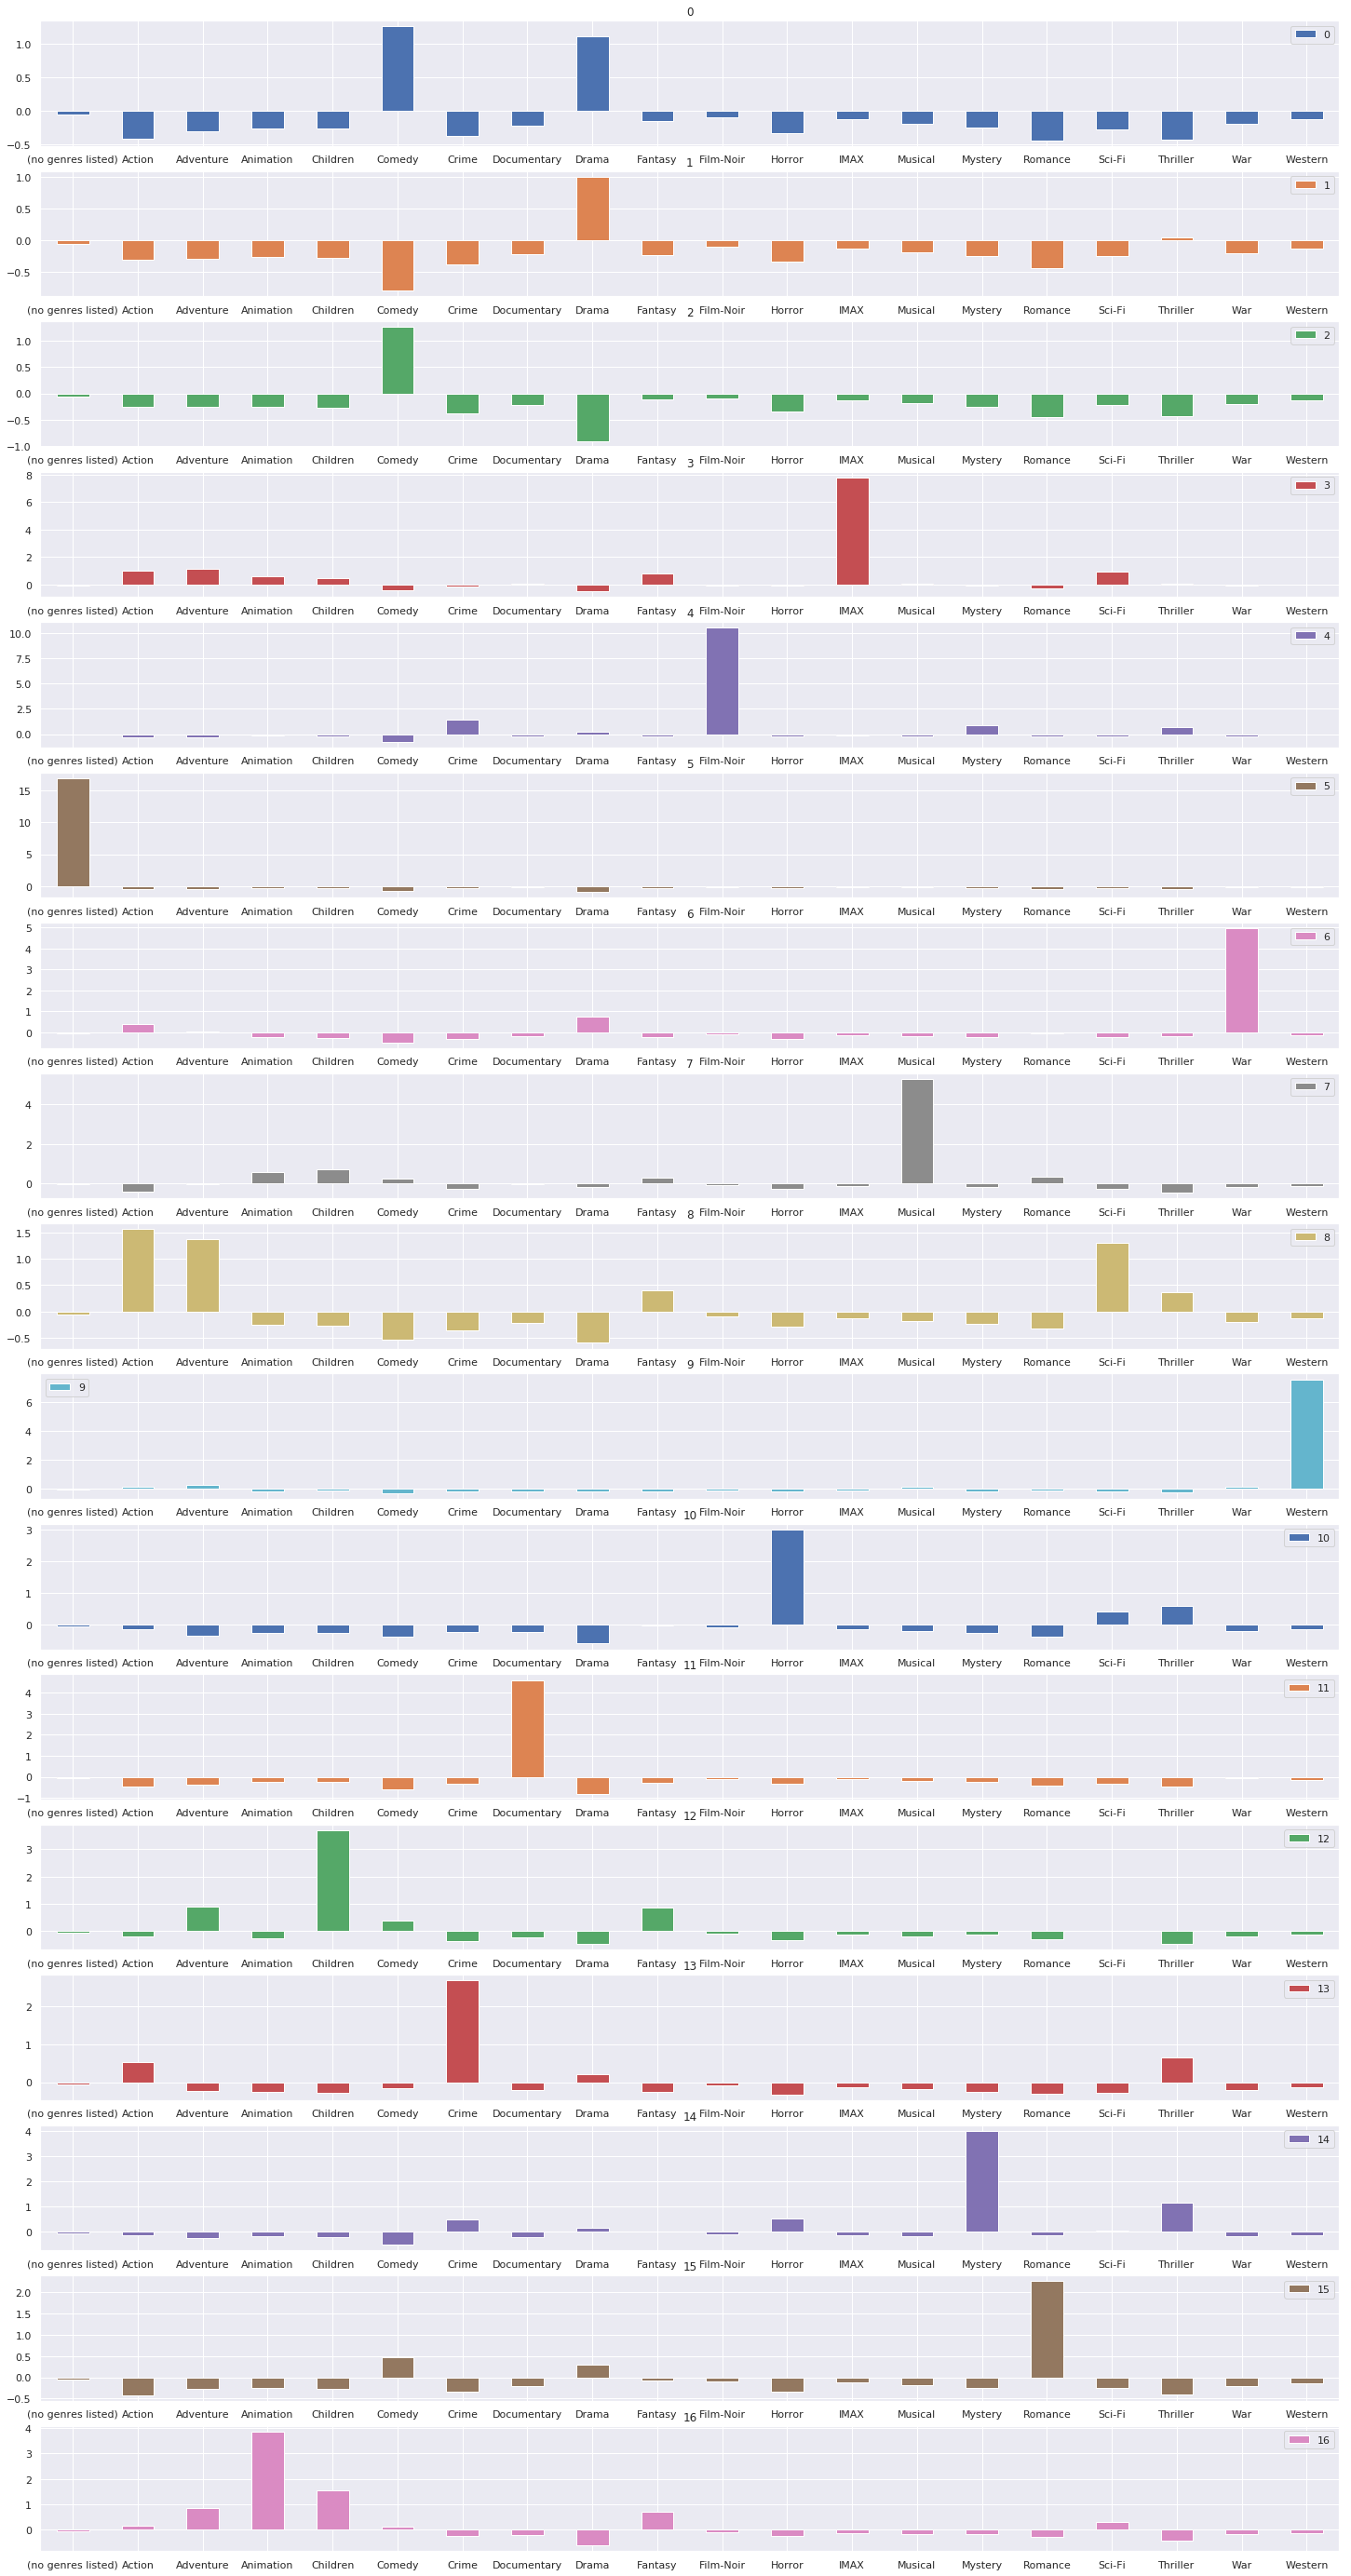

In [24]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

Podemos também realizar um filtro por algum grupo para ver se fazem sentido:

In [25]:
grupo = 16

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
6598,55442,Persepolis (2007),Animation|Drama,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3230,4366,Atlantis: The Lost Empire (2001),Adventure|Animation|Children|Fantasy,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8586,117368,The Madagascar Penguins in a Christmas Caper (...,Animation|Comedy,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9442,167036,Sing (2016),Animation|Children|Comedy,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2418,3213,Batman: Mask of the Phantasm (1993),Animation|Children,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9369,162578,Kubo and the Two Strings (2016),Adventure|Animation|Children|Fantasy,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5458,26133,"Charlie Brown Christmas, A (1965)",Animation|Children|Comedy,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5470,26183,Asterix and Cleopatra (Astérix et Cléopâtre) (...,Action|Adventure|Animation|Children|Comedy,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7510,83803,Day & Night (2010),Animation|Children,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8128,101423,Mezzo Forte (1998),Action|Animation|Comedy,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Vamos começar importando o algoritmo AgglomerativeClustering da biblioteca sklearn:

In [0]:
from sklearn.cluster import AgglomerativeClustering

Algoritmo importado, vamos criar um modelo e, seguindo o K-Means, vamos falar que queremos agrupar em 17 grupos. Modelo criado, basta falar para ele aprender e retornar os grupos (fit_predict):

In [27]:
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

Vamos rodar o algoritmo TSNE para visualizar os dados. Para isso, vamos utilizar a mesma abordagem que utilizamos anteriormente. Criar um objeto a partir da classe e pedir para ele transformar nossos gêneros:

In [28]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-12.372056, -55.82756 ],
       [-35.76181 ,  51.76237 ],
       [  8.950281,  12.237785],
       ...,
       [  9.22038 , -17.996933],
       [ 28.83809 ,  50.02609 ],
       [-21.523396,  10.175665]], dtype=float32)

Bacana! Agora, basta plotar com um gráfico de dispersão passando como parâmetro de cores os grupos criados pelo AgglomerativeClustering:

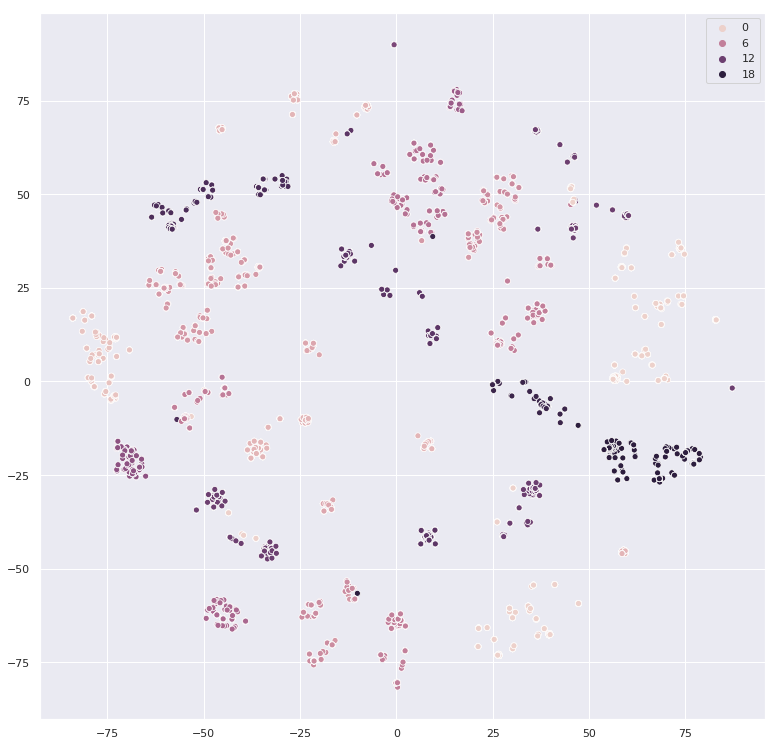

In [29]:
sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=grupos)

Porém, quando utilizamos o agrupamento hierárquico, uma forma comum de visualização é através do dendrograma. Para plotar o dendrograma, precisamos da matriz de distâncias dos dados e da função que plota o dendrograma propriamente dito. Vamos importá-las da biblioteca scipy:

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage

Antes de plotar o dendrograma, vamos agrupar novamente os dados com o K-Means para ter uma visualização dos centróides mais próxima a célula do dendrograma (e para sobrescrever as variáveis que usamos com o mesmo nome):

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb193fdfbe0>,
      dtype=object)

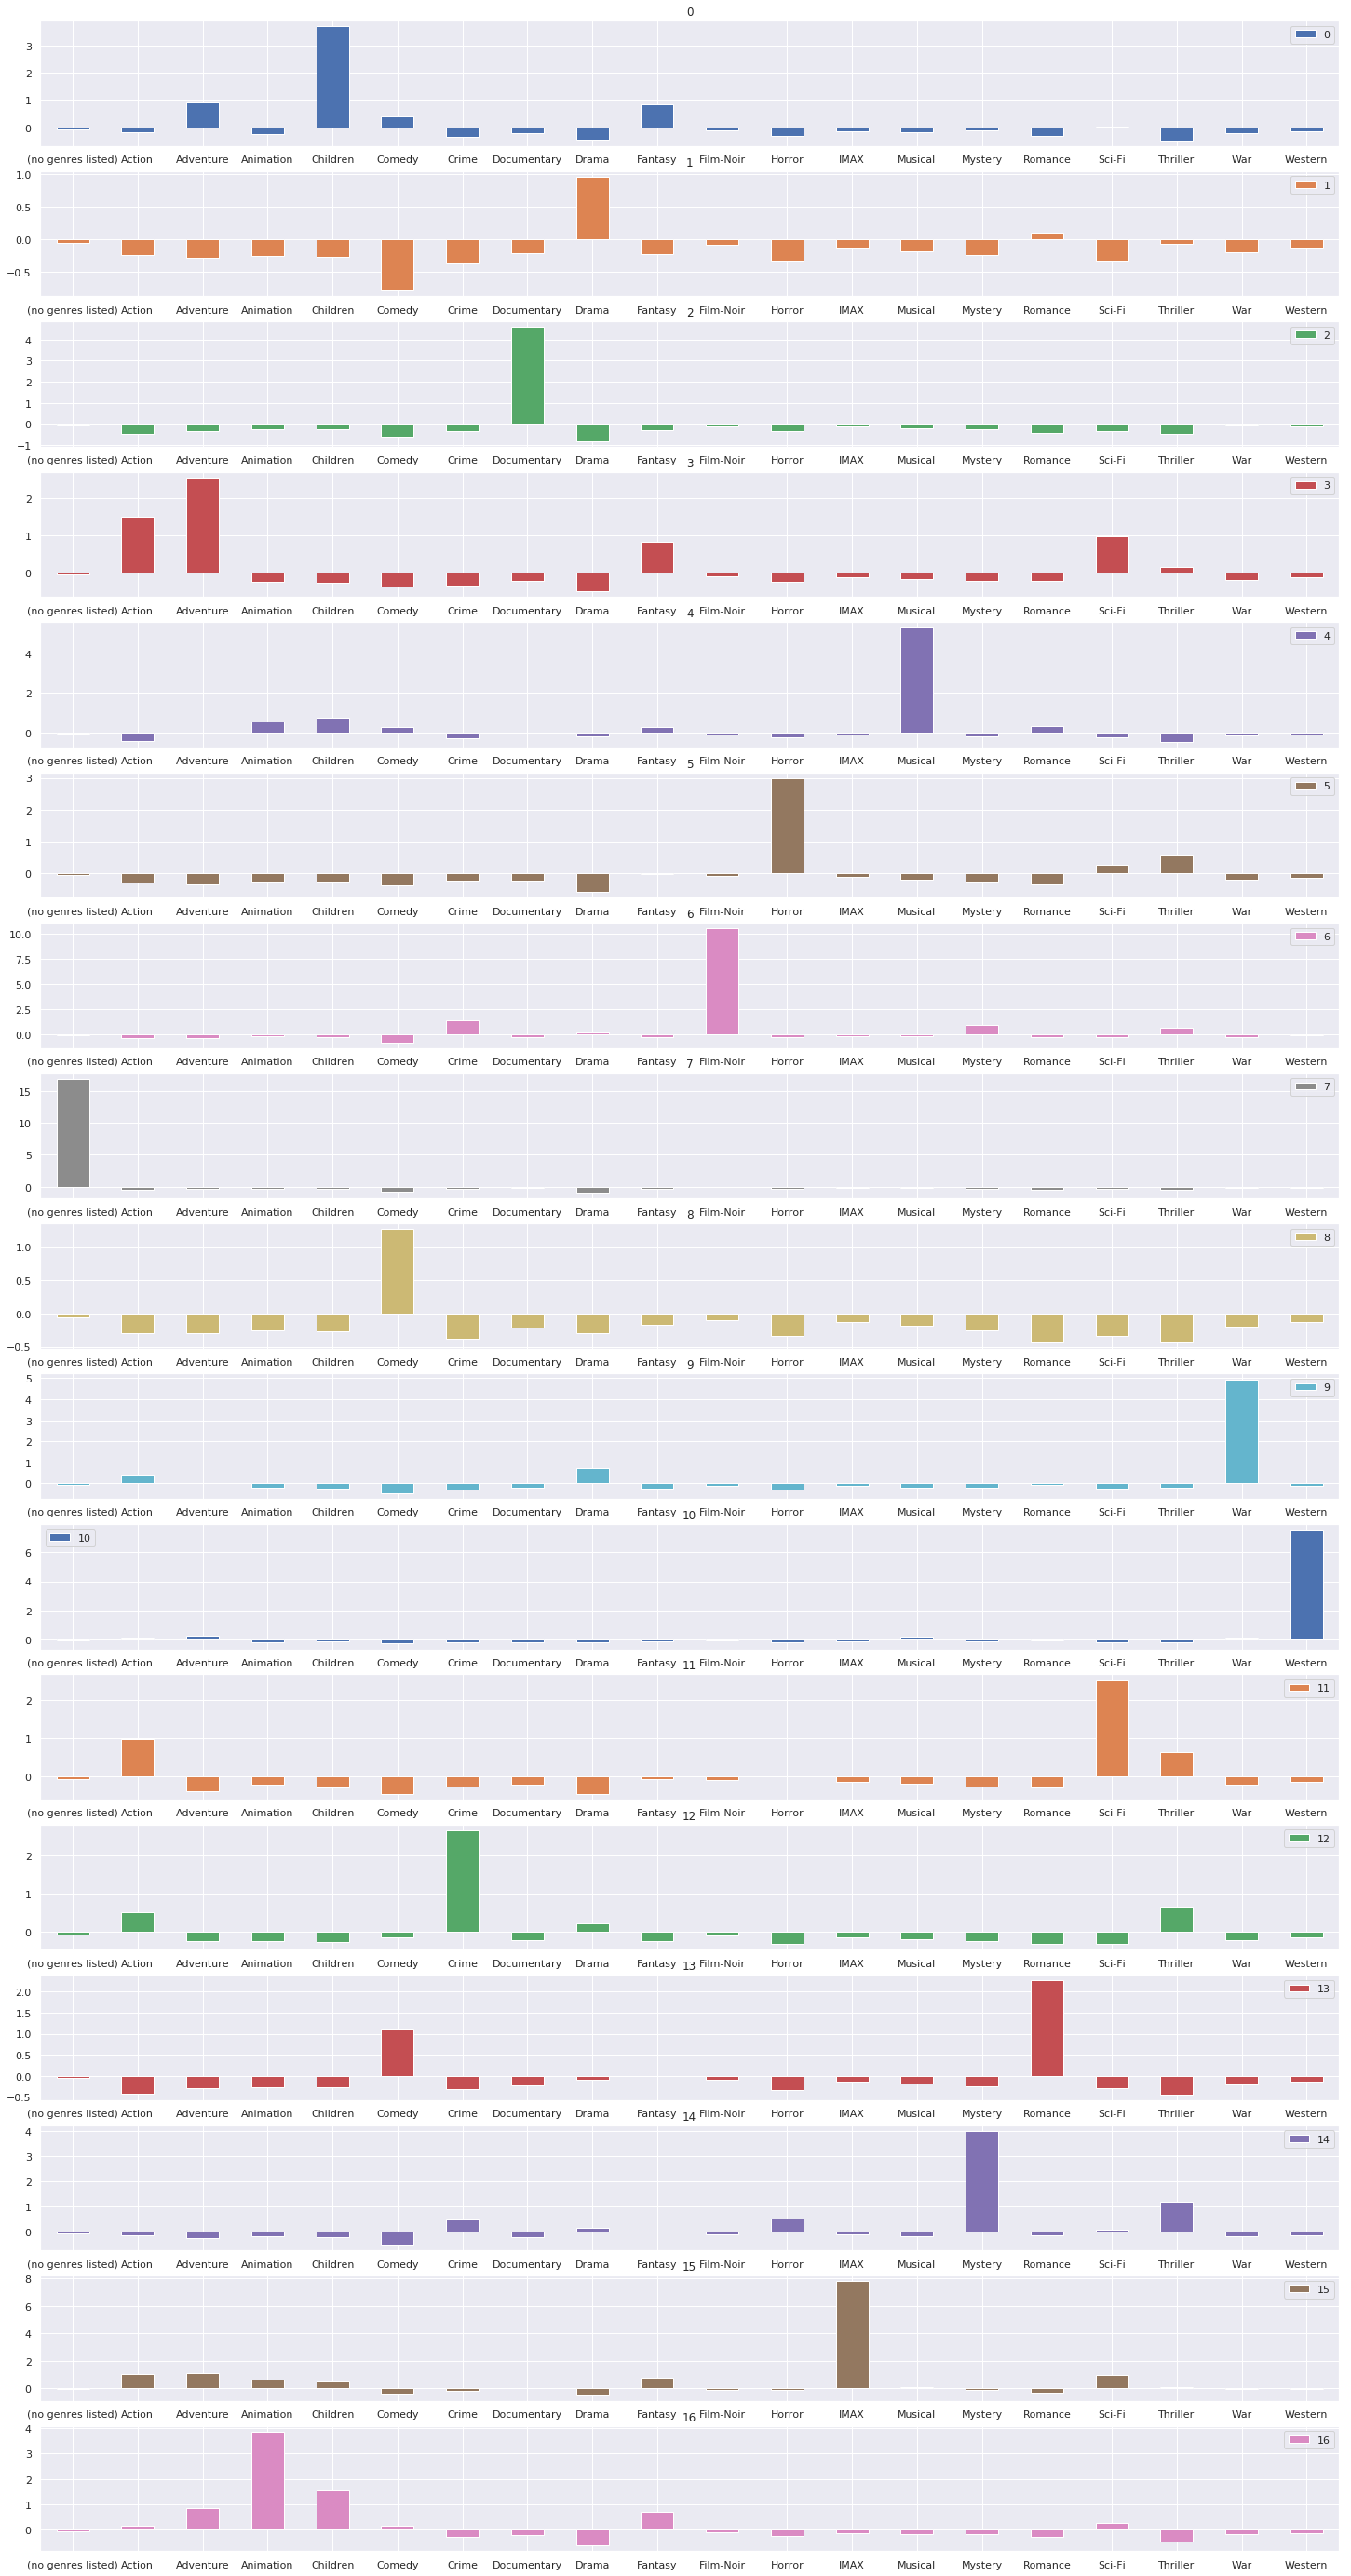

In [31]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

Agora, basta criarmos a matriz de distâncias baseada nos grupos do K-Means e plotar o dendrograma:

In [32]:

matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 1.        ,  8.        ,  2.49526215,  2.        ],
       [13.        , 17.        ,  2.72406261,  3.        ],
       [12.        , 18.        ,  3.39160158,  4.        ],
       [ 3.        , 11.        ,  3.53394941,  2.        ],
       [19.        , 20.        ,  3.54202484,  6.        ],
       [ 5.        , 21.        ,  3.83421204,  7.        ],
       [ 0.        , 22.        ,  4.38536498,  8.        ],
       [16.        , 23.        ,  4.68102874,  9.        ],
       [14.        , 24.        ,  4.70008561, 10.        ],
       [ 2.        , 25.        ,  5.18235987, 11.        ],
       [ 9.        , 26.        ,  5.22291744, 12.        ],
       [ 4.        , 27.        ,  5.81748716, 13.        ],
       [10.        , 28.        ,  7.85685541, 14.        ],
       [15.        , 29.        ,  8.15830801, 15.        ],
       [ 6.        , 30.        , 10.81646116, 16.        ],
       [ 7.        , 31.        , 17.07398024, 17.        ]])

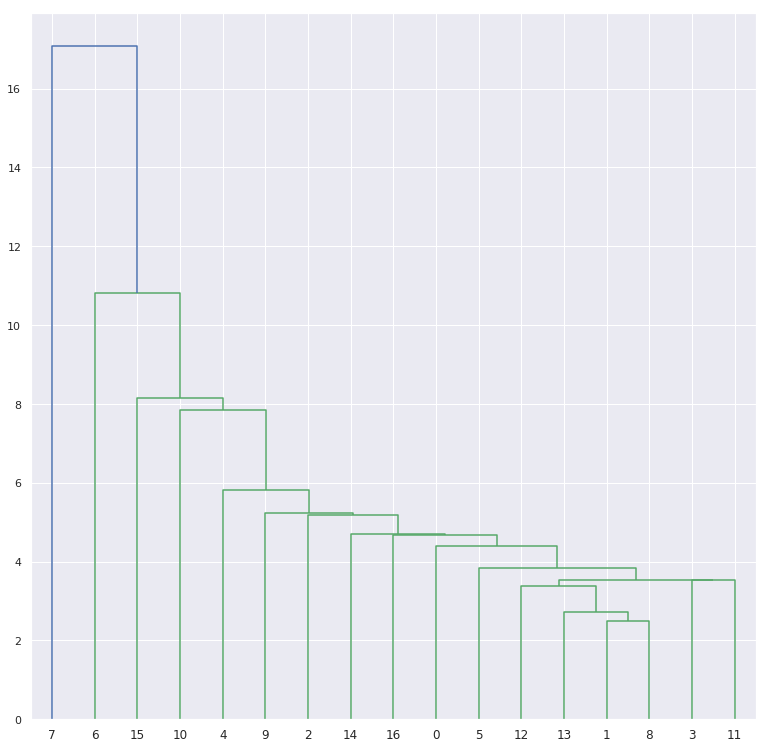

In [33]:
dendrograma = dendrogram(matriz_de_distancia)
